# ECHO21
# &copy; 2024 Shikhar Mittal.

## Here are some additional capabilities of ECHO21.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
np.seterr(all='ignore')

def Z2nu(Z):
    return 1420/Z

def nu2Z(nu):
    return 1420/nu

def plotter(x,y,xlog=True,ylog=False,Z=None):
    '''
    This function will plots the quantity y w.r.t. x. 
    
    Arguments
    ---------
    
    x : dictionary
        1+z ('z') or M_UV magnitude ('mag').
    
    y : dictionary
        Can be collisional coupling ('xk'), Lya coupling ('xa'), SFRD ('sfrd'), CMB optical depth ('tau'), or UV LF ('uvlf').
        
    xlog : bool, optional
        Set True if you want x axis to be in log scale otherwise false. Default is True.
        
    ylog : bool, optional
        Set True if you want x axis to be in log scale otherwise false. Default is False.

    z: float (array or list)
        Redshift values at which the UV LFs are calculated. Meaningful only when x is 'mag'.
    '''
    
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')

    fig,ax=plt.subplots(figsize=(8.3,7.2),dpi=300)
    fig.subplots_adjust(left=0.14, bottom=0.07, right=0.86, top=0.97)
    clr=['b','r','limegreen']
    linsty=['-','--',':']

    xkey = list(x.keys())
    leng = len(y)
    ykeys = list(y.keys())

    if xkey[0]=='z':
        if leng>1:
            for i in range(leng):
                if ykeys[i]=='xk':
                    lbl = r'$x_{\mathrm{k}}$'
                elif ykeys[i]=='xa':
                    lbl = r'$x_{\alpha}$'
                else:
                    print('Warning: unknown quantity given in the dictionary!')
                ax.plot(x[xkey[0]],y[ykeys[i]],color=clr[i],ls=linsty[i],label=lbl)
                
            if ykeys[0]=='xk' or ykeys[0]=='xa':
                ax.set_ylabel('Couplings',fontsize=20)
            else:
                print('Warning: unknown quantity given in the dictionary!')
            ax.legend(fontsize=18,frameon=False)
        else:
            key=ykeys[0]
            ax.plot(x[xkey[0]],y[key],'b')
            if key=='xk':
                ax.set_ylabel(r'$x_{\mathrm{k}}$',fontsize=20)
            elif key=='xa':
                ax.set_ylabel(r'$x_{\alpha}$',fontsize=20)
            elif key=='sfrd' or key=='SFRD':
                ax.set_ylabel(r'$\dot{\rho}_{\star}\,(\mathrm{M_{\odot}\,cMpc^{-3}yr^{-1}})$',fontsize=20)
            elif key=='tau':
                ax.set_ylabel(r'$\tau_{\mathrm{e}}\,$',fontsize=20)
            else:
                print("Error: unknown quantity.")
                sys.exit()
    
            
        if xlog==True:
            ax.set_xscale('log')
        if ylog==True:
            ax.set_yscale('log')
    
        ax.set_xlabel(r'$1+z$',fontsize=20)
        ax.invert_xaxis()
    elif xkey[0] == 'mag':
        len_z=len(Z)
        if len_z>1:
            for i in range(len_z):
                ax.semilogy(x[xkey[0]],y[ykeys[0]][i,:],color=clr[i],ls=linsty[i],label='$z = {}$'.format(Z[i]-1))
            ax.legend(fontsize=18,frameon=False)
        else:
            ax.semilogy(x[xkey[0]],y[ykeys[0]],color='b')
        ax.set_xlabel(r'$M_{\mathrm{UV}}$',fontsize=20)    
        ax.set_ylabel(r'$\phi\,\Bigg(\mathrm{cMpc^{-3}mag^{-1}}\Bigg)$',fontsize=20)
    ax.tick_params(axis='both', which='major', length=5, width=1, labelsize=20,direction='in',pad=10)
    ax.tick_params(axis='both', which='minor', length=3, width=1, direction='in')
    ax.minorticks_on()
    ax.yaxis.set_ticks_position('both')
    ax.xaxis.set_ticks_position('both')
    ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
    plt.show()
    return None

First load the package. Then set your cosmological and astrophysical parameters. Remember they should be the same ones you used for running the pipeline `echo.pipeline()`.

In [ ]:
import sys
#sys.path.insert(0,'/home/sm2941/Dropbox/echo21/src/')
sys.path.insert(0,'/mnt/c/Users/dell/Desktop/Dropbox/echo21/src/')
from echo21 import echofuncs

#The following should be the same ones you gave for running the pipeline.
cosmo = {'Ho':67.4,'Om_m':0.315,'Om_b':0.049,'sig8':0.811,'ns':0.965,'Tcmbo':2.725,'Yp':0.245}
astro = {'fLy':1,'sLy':2.64,'fX':1,'wX':1.5,'fesc':0.0106}

#Now initialise object.
myobj = echofuncs.funcs(cosmo=cosmo, astro=astro, type='phy')


First set the path to output folder.

In [ ]:
output = '/mnt/d/test_echo21/fid/'

### You can produce collisional and Ly$\alpha$ coupling trends

Before generate the couplings, load the redshifts, temperature and electron fraction.

In [2]:
one_plus_z = np.load(output+'one_plus_z.npy')
xe = np.load(output+'xe.npy')
Tk = np.load(output+'Tk.npy')

NameError: name 'np' is not defined

In [ ]:
xk=myobj.hyfi_col_coup(Z=one_plus_z,xe=xe,Tk=Tk)
xa=myobj.hyfi_lya_coup(Z=one_plus_z,xe=xe,Tk=Tk)

### Now plot them.

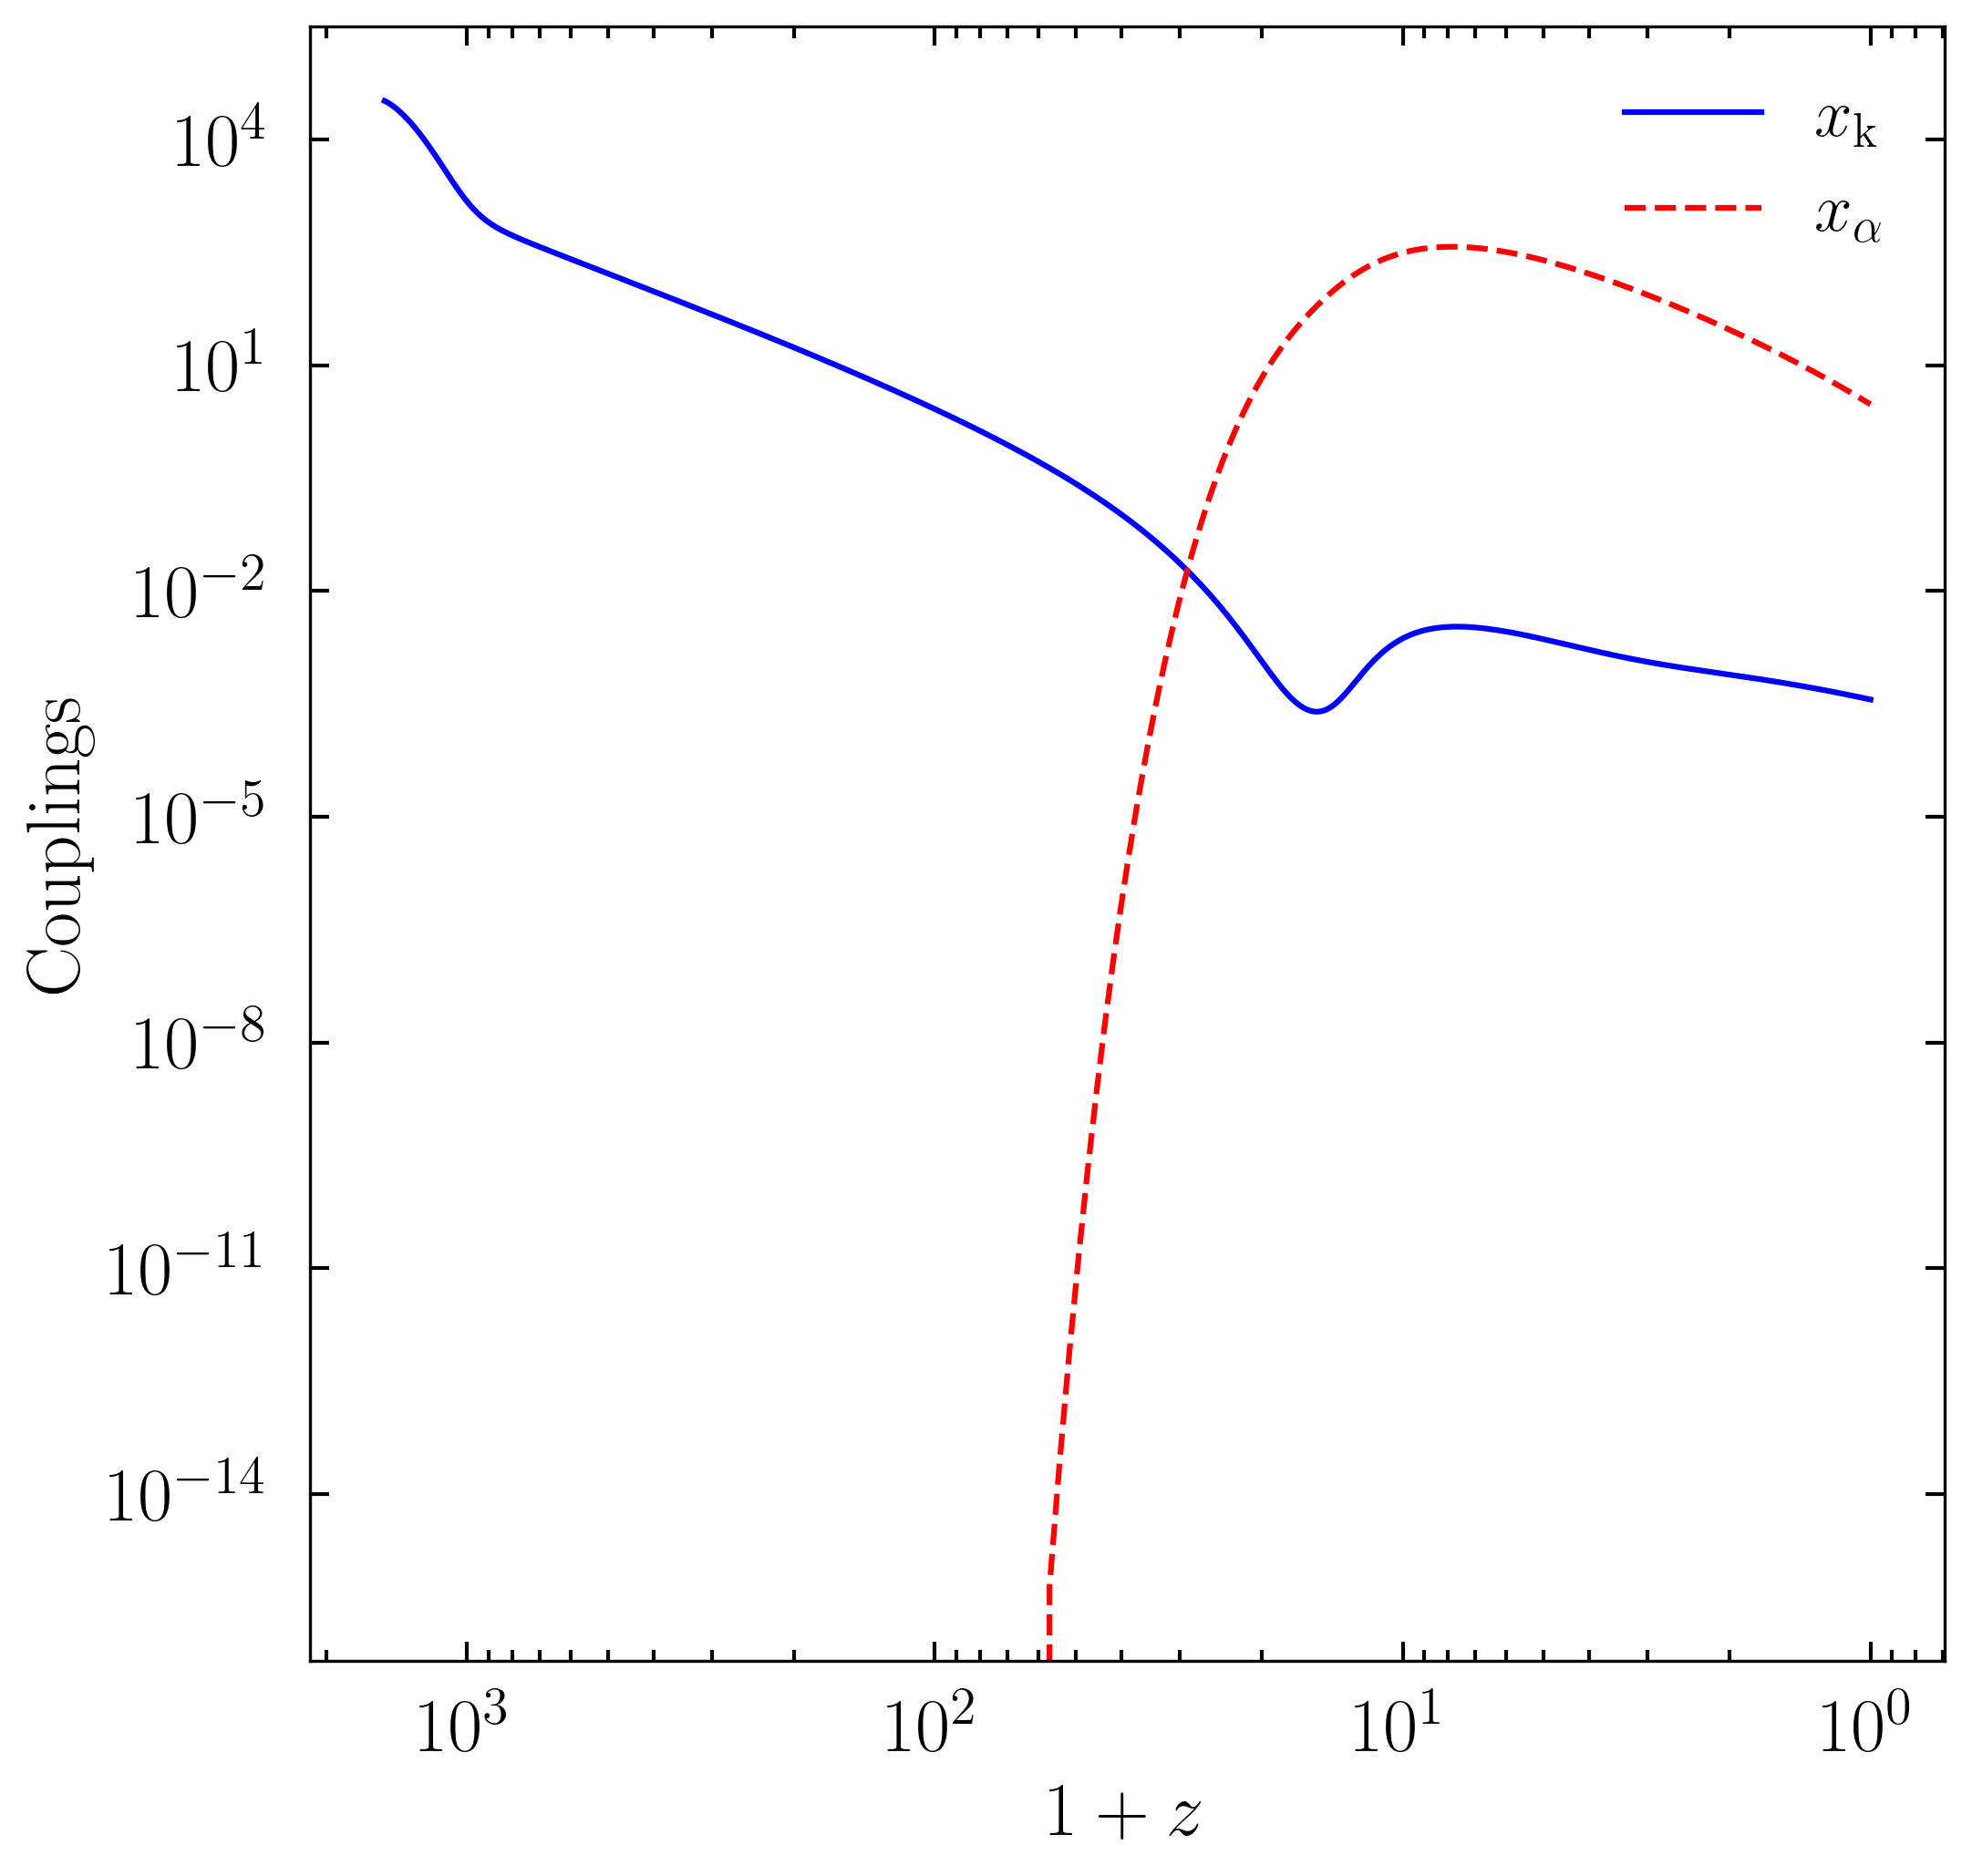

In [12]:
plotter(x={'z':one_plus_z},y={'xk':xk,'xa':xa},xlog=True,ylog=True)

### Let us look at the SFRD plot.

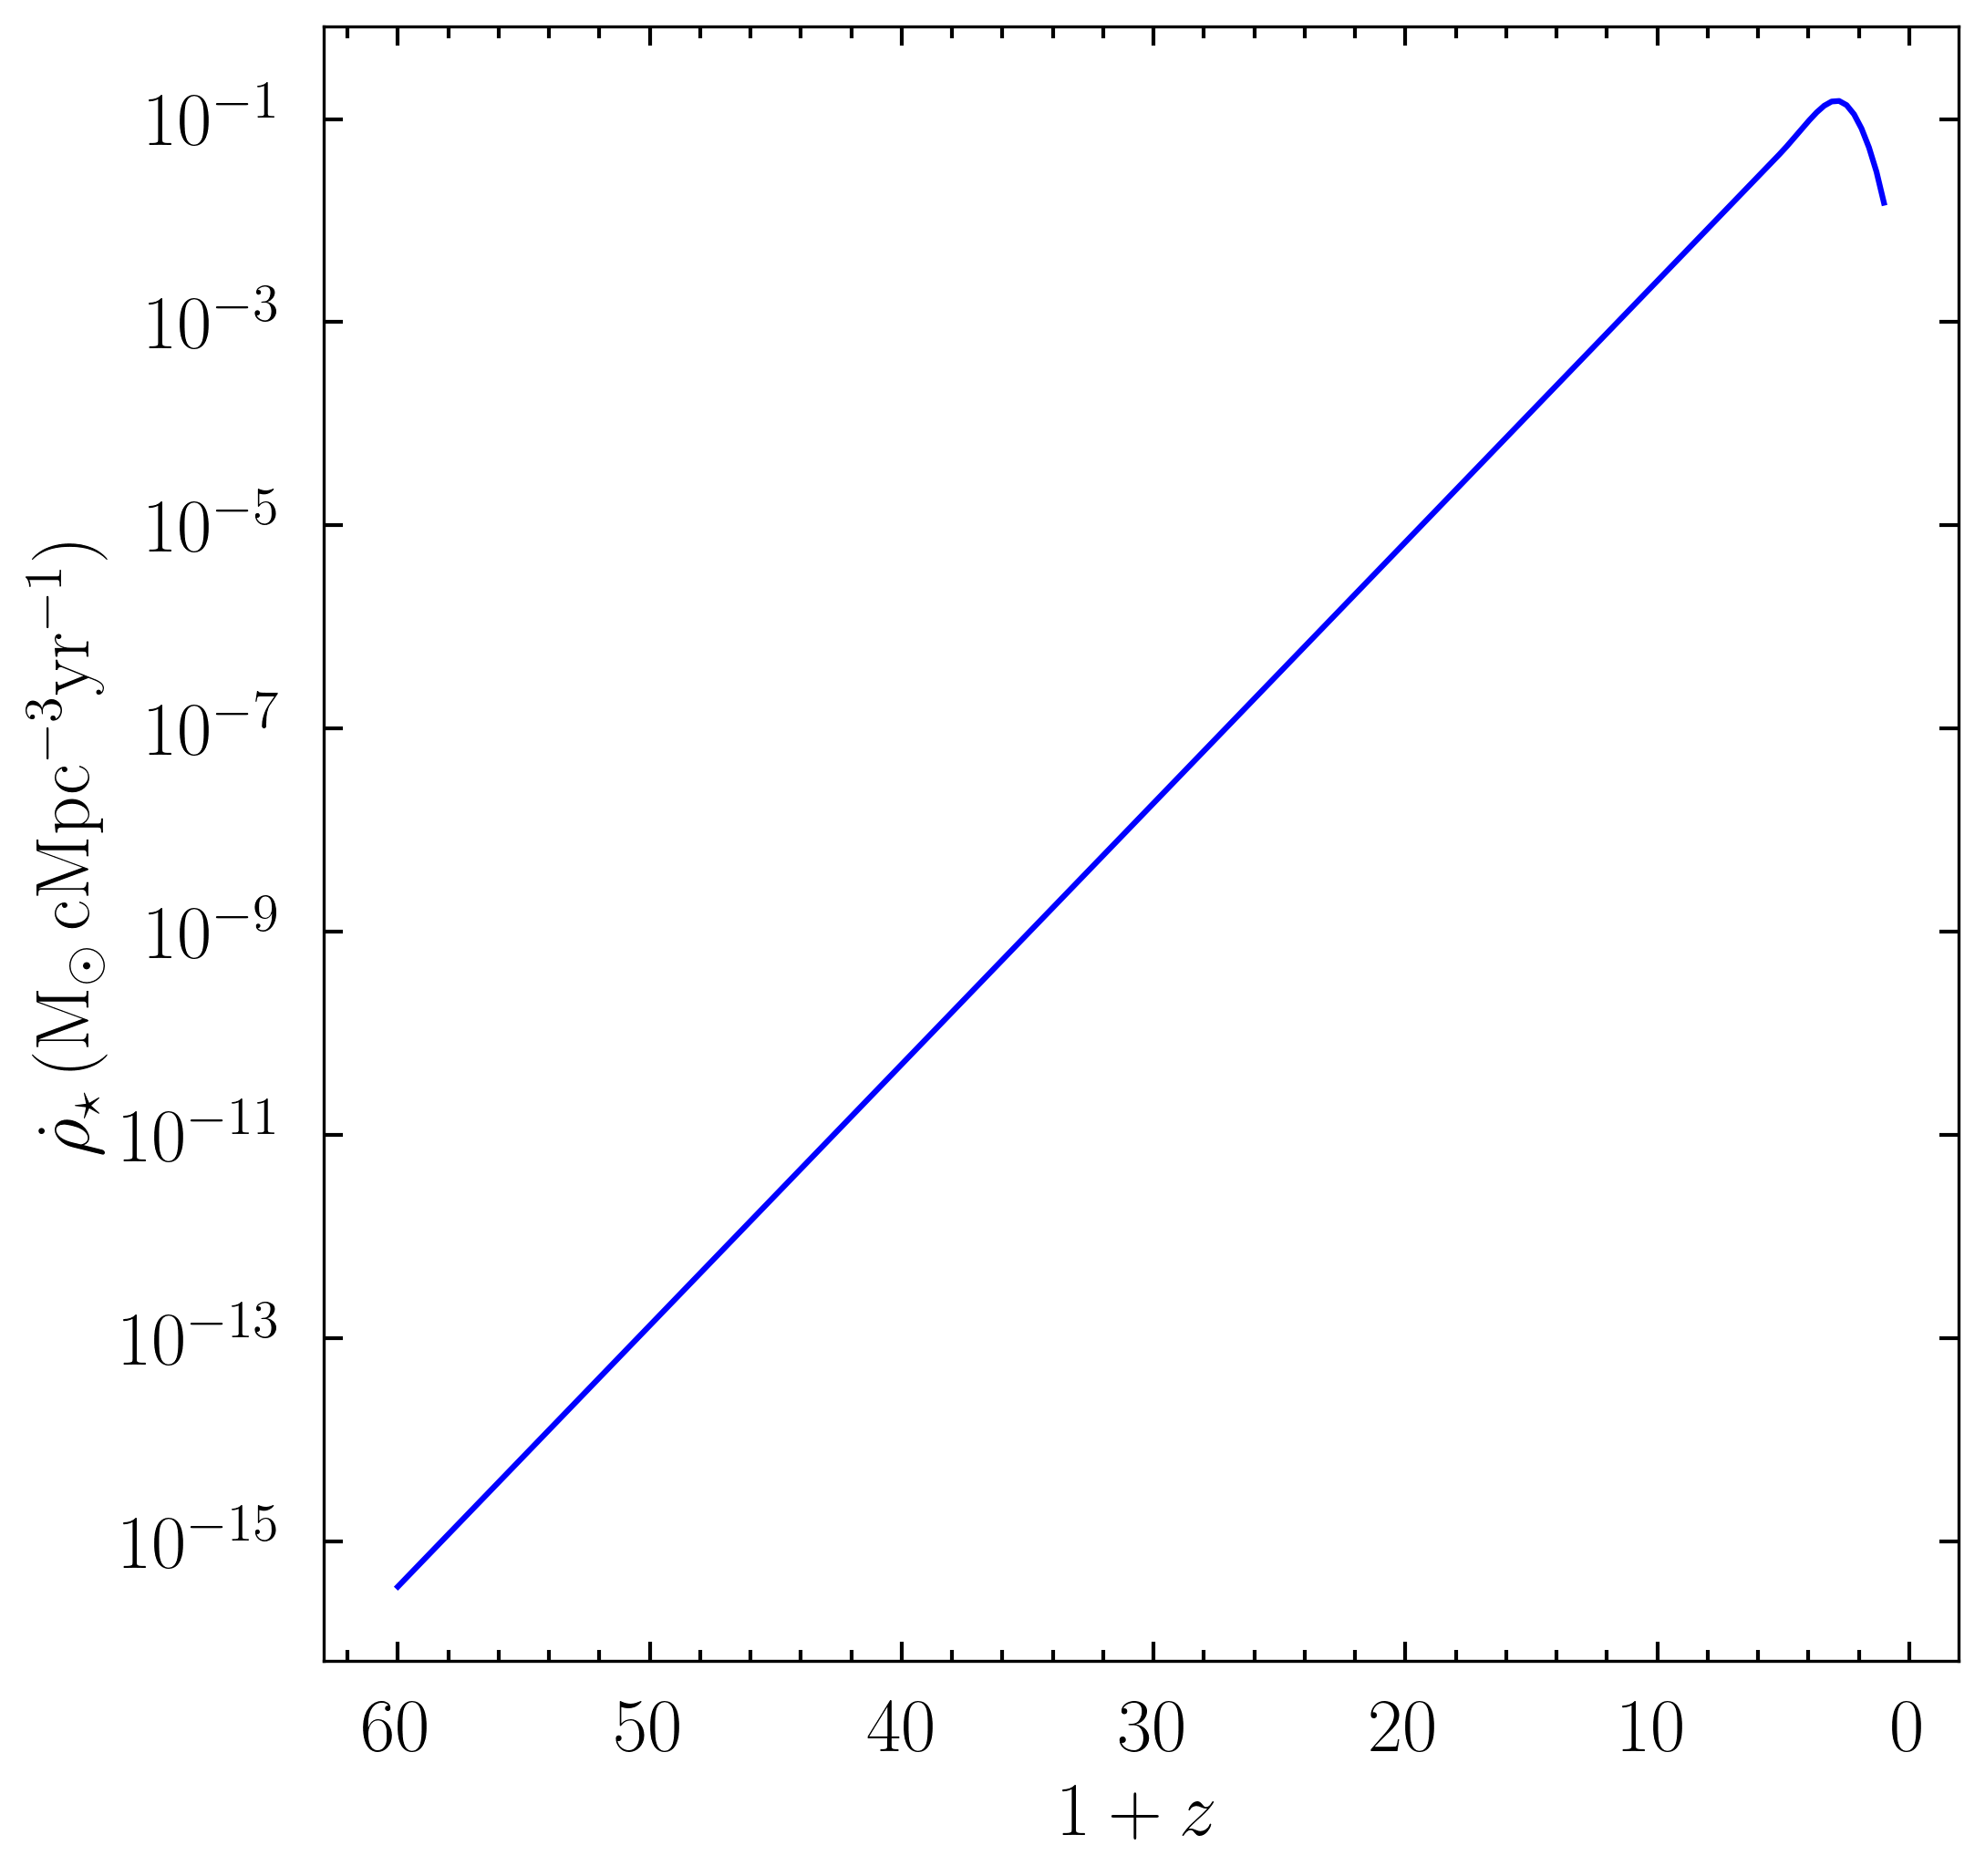

In [ ]:
from echo21 import const

Z=np.linspace(60,1,200)
sfrd = myobj.sfrd(Z)
sfrd = sfrd/const.Msolar_by_Mpc3_year_to_kg_by_m3_sec

np.save('/mnt/d/test_echo21/emp/sfrd',sfrd)

plotter({'z':Z},{'sfrd':sfrd},xlog=False, ylog=True)

### Let us look at the CMB optical depth

In [ ]:
# First generate a redshift range
Z = np.linspace(20,1,200)

# Load the default Q solution
Q_default = np.load(output+'Q_default.npy')

# Now generate the CMB optical depth
tau = myobj.reion_tau(Z,Q_default)

np.save('/mnt/d/test_echo21/fiducial/tau_e',tau)

### Now plot it.

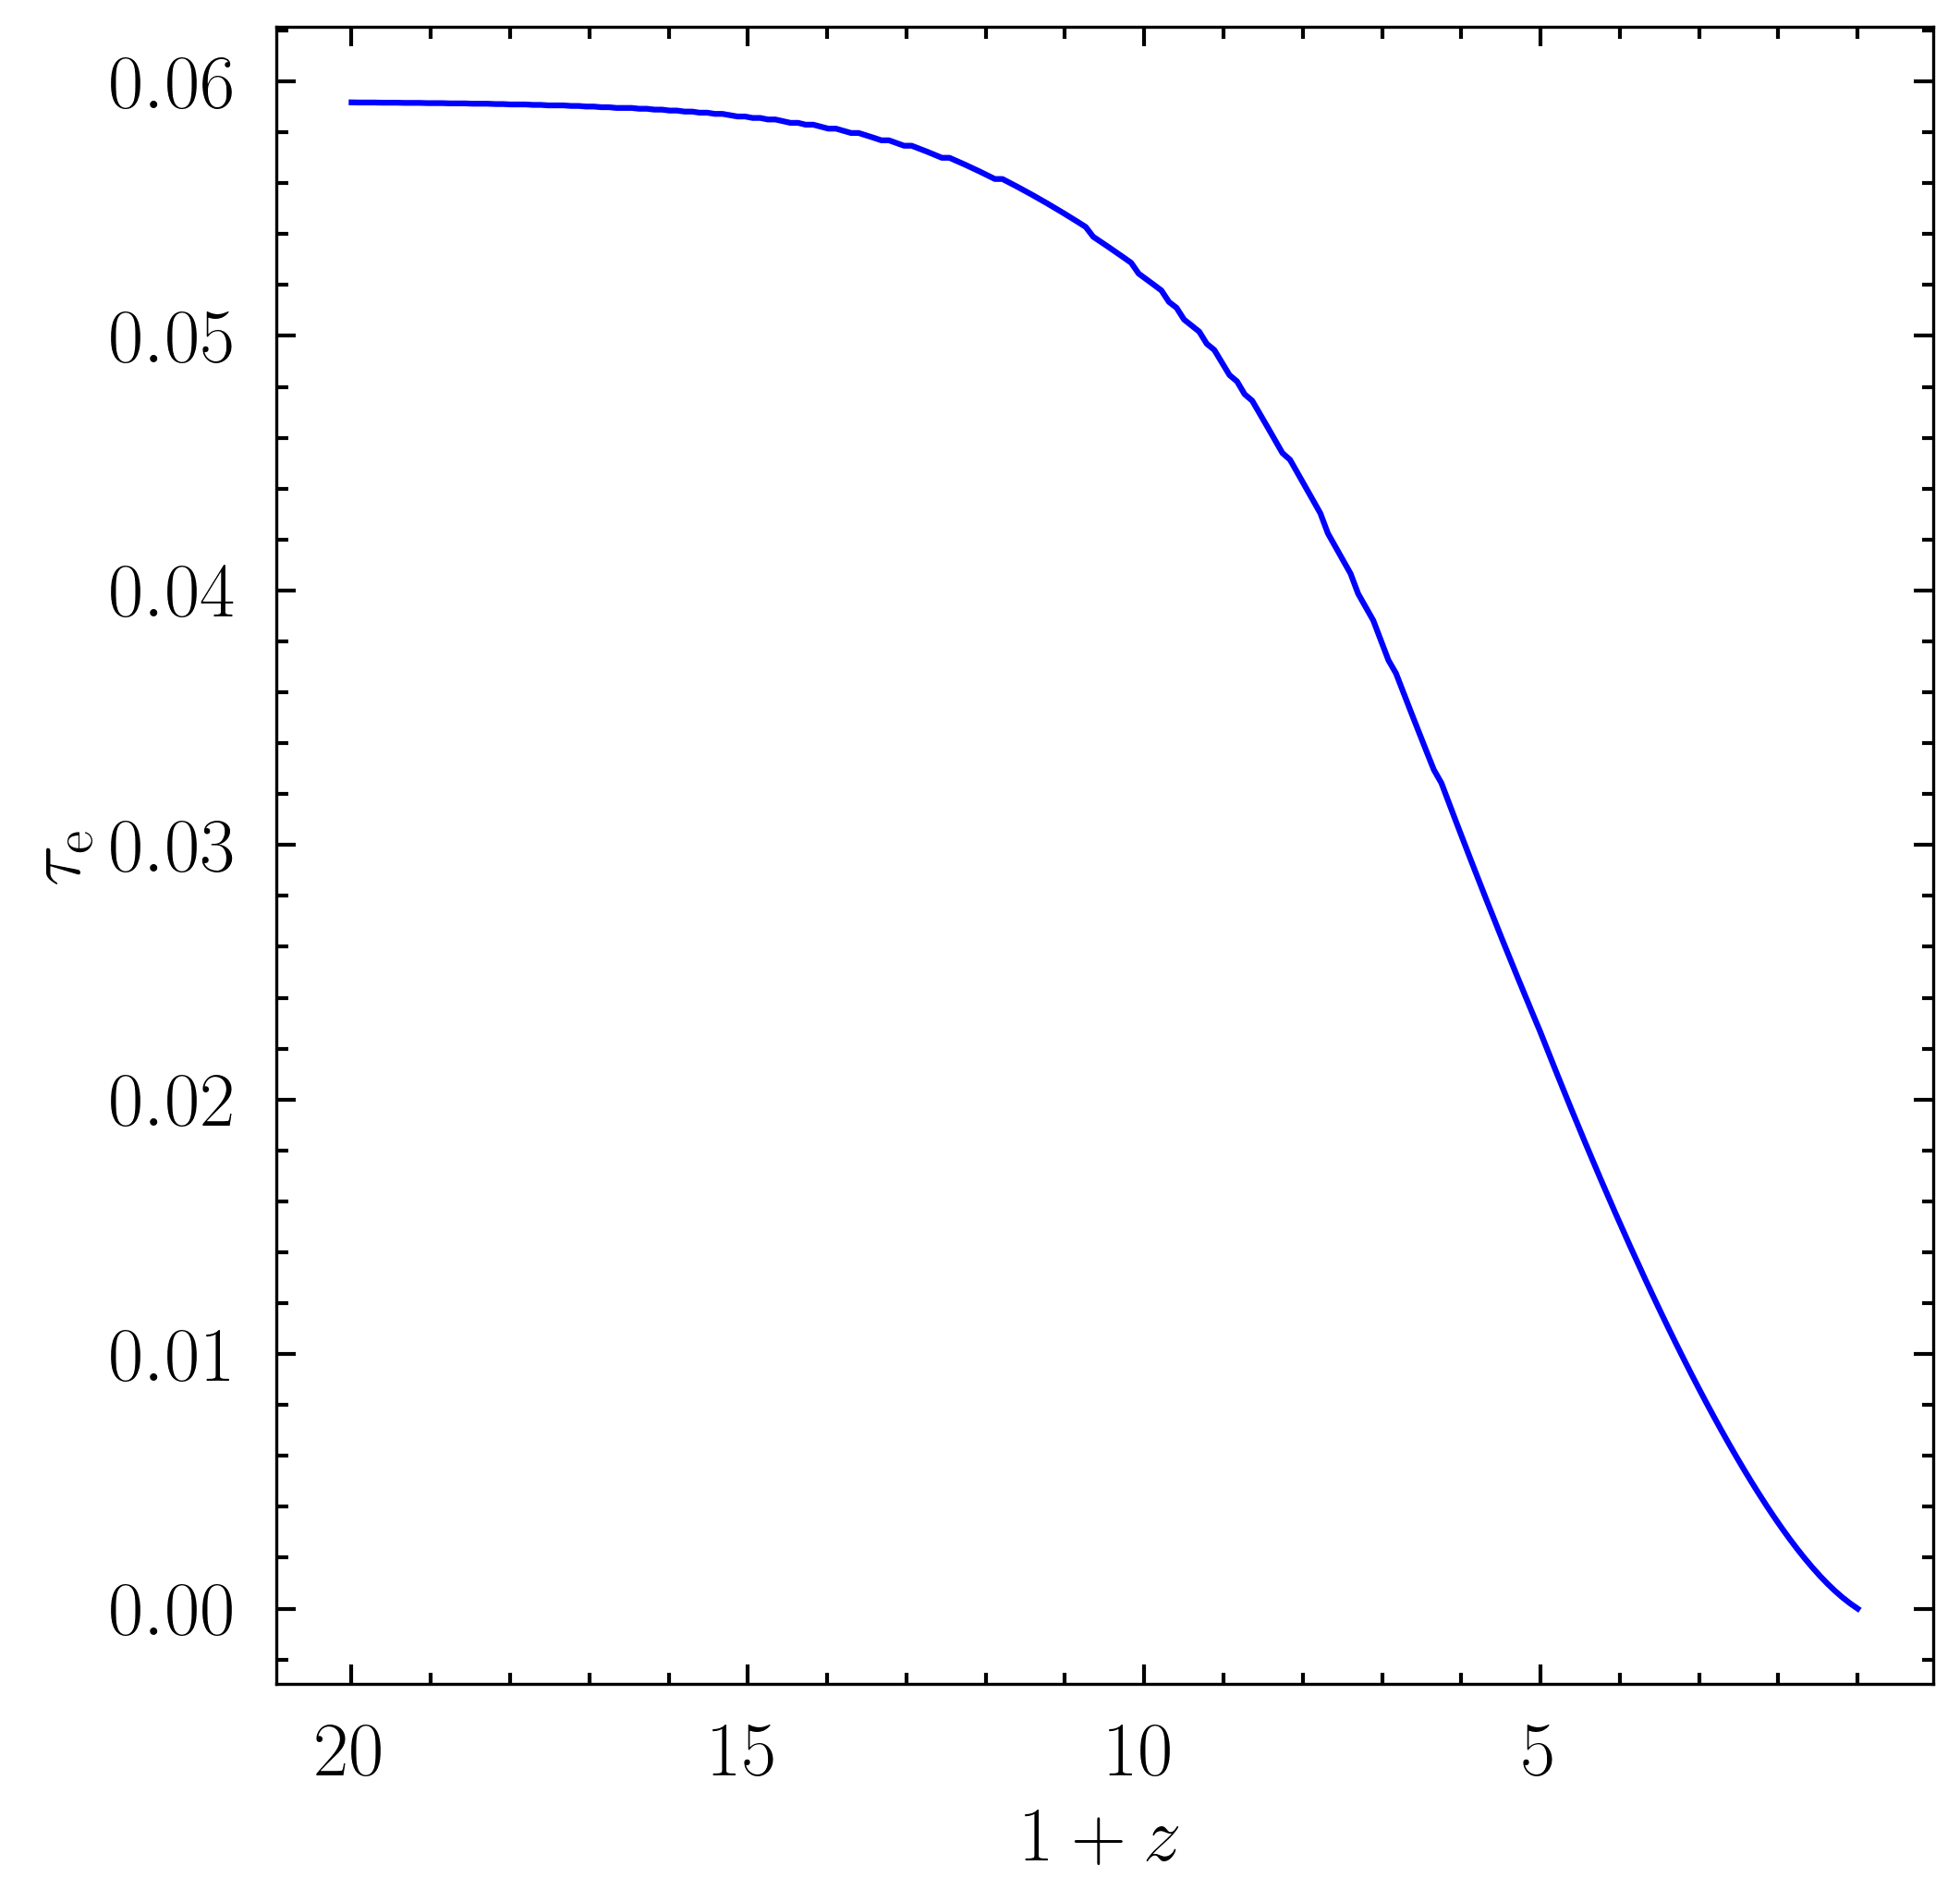

In [11]:
plotter({'z':Z},{'tau':tau},xlog=False, ylog=False)